GAMA Hosts paper

Author: Maria B. Stone

# Specific Star Formation Rate (sSFR) correction

## Step 1. In this step, I prepare the data tables.

I prepare the sSFR datatable for normal galaxies based on CIGALE data and based on MAGPHYS data.

-------

Here we import the necessary packages.

In [1]:
import numpy as np
from astropy import units as u
from astropy.table import Table, join, vstack
from astropy.io import ascii

# for fitting a line
from scipy import stats

# for plotting
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

import math

Data tables are stored in the directory '1_tables'.
They will be called from inside it in the code.

In [2]:
DATA_DIR = "../1_tables/"

open the CIGALE results table for normal galaxies, which includes the estimates of sSFR

In [3]:
data_cigale = Table.read(DATA_DIR + 'results_galaxies.fits')

Let's look what is inside.

We need only the ID column and the column for the sSFR estimates.

Also, we need to change the ID column name to 'CATAID', so that it matches the second datatable, so that we can combine the datatables based on the CATAID value.


In [4]:
data_cigale.info()

<Table length=205>
                 name                  dtype      unit    
------------------------------------- ------- ------------
                                   id   int64             
                   bayes.sfh.age_main float64          Myr
               bayes.sfh.age_main_err float64          Myr
                        bayes.sfh.sfr float64 solMass / yr
                    bayes.sfh.sfr_err float64 solMass / yr
                 bayes.sfh.sfr100Myrs float64 solMass / yr
             bayes.sfh.sfr100Myrs_err float64 solMass / yr
                  bayes.sfh.sfr10Myrs float64 solMass / yr
              bayes.sfh.sfr10Myrs_err float64 solMass / yr
                 bayes.stellar.m_star float64      solMass
             bayes.stellar.m_star_err float64      solMass
                      best.chi_square float64             
              best.reduced_chi_square float64             
            best.agn.fracAGN_dale2014 float64             
         best.attenuation.E_BV_factor

In [5]:
# Visualizing the fist few entries
data_cigale[:4]

id,bayes.sfh.age_main,bayes.sfh.age_main_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.chi_square,best.reduced_chi_square,best.agn.fracAGN_dale2014,best.attenuation.E_BV_factor,best.attenuation.E_BV_lines,best.attenuation.E_BVs,best.attenuation.FUV,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.dust.alpha,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.FUV,best.NUV,best.u_prime,best.g_prime,best.r_prime,best.i_prime,best.z_prime,best.Paranal_VISTA_Z_filter,best.Paranal_VISTA_Y_filter,best.Paranal_VISTA_J_filter,best.Paranal_VISTA_H_filter,best.Paranal_VISTA_Ks_filter,best.WISE1,best.WISE2,best.WISE3,best.WISE4,best.PACS_green,best.PACS_red,best.PSW_ext,best.PMW_ext,best.PLW_ext
,Myr,Myr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass,solMass,,,,,mag,mag,mag,,,nm,nm,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7295,9324.49323167307,590.3363570111959,0.13337753730188573,0.06816537661650701,0.13941988903231986,0.07118569800217289,0.13391250238072244,0.06843298291763528,75347502355.91,4789210363.00404,4.266240944439845,0.21331204722199226,0.0,0.44,0.1,0.044000000000000004,0.473906206250691,-0.2,0.0,217.5,35.0,2.0,9000.0,50.0,9000.0,0.0,50.0,1000.0,6986.541931772296,1.0,0.02,10.0,11019.697167817974,3.5261350875814536e+25,0.22950999438762665,1.427037198531657e+36,135933819567.87445,0.15130117476267366,0.1581557150005561,0.15190805133274538,2.08447357210434e+37,1.28890473165179e+35,5.59891621392213e+34,7.29013110259577e+34,2.0469052708701232e+37,3.7568301234216586e+35,64531944701.54616,64531854471.854294,90229.69186933538,71401874865.87373,71400446015.50706,1428850.3666657296,3.42547007319675e+52,1.2174193811965494e+52,2.2080506920002008e+52,0.0009924059731090998,0.0012616898514302365,0.00461446398991896,0.027876263693897438,0.09108680599489014,0.1485729918533819,0.1962568983359533,0.18530308752015393,0.23873841293743048,0.33693064122485955,0.3883328578083225,0.4663804430970093,0.23243572768811918,0.16992725580936344,0.08550814553058815,0.07470652882635116,1.5551413991478216,2.0186479296084414,1.318778914029003,0.6501001773405274,0.23467134227506964
8123,9646.753199662126,487.5656563873294,0.226770374321801,0.09727710251569821,0.23710250505378447,0.10162680093924703,0.2276849600130694,0.097662371182098,175803392338.8815

In [6]:
# change the name of the id column
data_cigale.rename_column('id','CATAID')

In [7]:
# Visualize the result 
data_cigale[:4]

CATAID,bayes.sfh.age_main,bayes.sfh.age_main_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.chi_square,best.reduced_chi_square,best.agn.fracAGN_dale2014,best.attenuation.E_BV_factor,best.attenuation.E_BV_lines,best.attenuation.E_BVs,best.attenuation.FUV,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.dust.alpha,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.FUV,best.NUV,best.u_prime,best.g_prime,best.r_prime,best.i_prime,best.z_prime,best.Paranal_VISTA_Z_filter,best.Paranal_VISTA_Y_filter,best.Paranal_VISTA_J_filter,best.Paranal_VISTA_H_filter,best.Paranal_VISTA_Ks_filter,best.WISE1,best.WISE2,best.WISE3,best.WISE4,best.PACS_green,best.PACS_red,best.PSW_ext,best.PMW_ext,best.PLW_ext
,Myr,Myr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass,solMass,,,,,mag,mag,mag,,,nm,nm,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
7295,9324.49323167307,590.3363570111959,0.13337753730188573,0.06816537661650701,0.13941988903231986,0.07118569800217289,0.13391250238072244,0.06843298291763528,75347502355.91,4789210363.00404,4.266240944439845,0.21331204722199226,0.0,0.44,0.1,0.044000000000000004,0.473906206250691,-0.2,0.0,217.5,35.0,2.0,9000.0,50.0,9000.0,0.0,50.0,1000.0,6986.541931772296,1.0,0.02,10.0,11019.697167817974,3.5261350875814536e+25,0.22950999438762665,1.427037198531657e+36,135933819567.87445,0.15130117476267366,0.1581557150005561,0.15190805133274538,2.08447357210434e+37,1.28890473165179e+35,5.59891621392213e+34,7.29013110259577e+34,2.0469052708701232e+37,3.7568301234216586e+35,64531944701.54616,64531854471.854294,90229.69186933538,71401874865.87373,71400446015.50706,1428850.3666657296,3.42547007319675e+52,1.2174193811965494e+52,2.2080506920002008e+52,0.0009924059731090998,0.0012616898514302365,0.00461446398991896,0.027876263693897438,0.09108680599489014,0.1485729918533819,0.1962568983359533,0.18530308752015393,0.23873841293743048,0.33693064122485955,0.3883328578083225,0.4663804430970093,0.23243572768811918,0.16992725580936344,0.08550814553058815,0.07470652882635116,1.5551413991478216,2.0186479296084414,1.318778914029003,0.6501001773405274,0.23467134227506964
8123,9646.753199662126,487.5656563873294,0.226770374321801,0.09727710251569821,0.23710250505378447,0.10162680093924703,0.2276849600130694,0.097662371182098,175803392338.

-------

Now, let's get the MAGPHYS data.

In [8]:
# open MAGPHYS results for a single set of normal galaxies, which is our control
data_magphys = Table.read(DATA_DIR + '12_data_seed_gals_set199_magphys.fits')

In [9]:
# Visualize the data table
data_magphys[:4]

CATAID,RA,DEC,Z,mass_stellar_best_fit,mass_dust_best_fit,SFR_0_1Gyr_best_fit,sSFR_0_1Gyr_best_fit,fb17_percentile50,fb18_percentile50,fb19_percentile50,fb29_percentile50,sfr17_percentile50,sfr18_percentile50,sfr19_percentile50,sfr29_percentile50
,deg,deg,,solMass,solMass,solMass / yr,1 / yr,,,,,solMass / yr,solMass / yr,solMass / yr,solMass / yr
int64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
7295,176.71879,0.64184,0.22951,46930000000.0,752200.0,0.04665,9.94e-13,0.0005,0.0005,0.0005,0.0005,-11.41,-11.4,-11.19,-10.7
8123,180.59187,0.7585,0.23575,98410000000.0,1821000.0,0.2654,2.697e-12,0.0005,0.0005,0.0005,0.0005,-11.47,-11.45,-11.27,-10.9
8716,183.63725,0.81274,0.308,36260000000.0,2205000.0,0.3728,1.028e-11,0.0005,0.0005,0.0005,0.4725,-10.78,-10.77,-10.56,-9.178
14485,211.78927,0.72757,0.18342,99320000000.0,42690000.0,1.325,1.334e-11,0.0005,0.0005,0.0005,0.0335,-10.54,-10.53,-10.23,-10.19


----------

Now, we work on joining the tables together based on the CATAIDs.

Now, each normal galaxy entry (defined by its CATAID) has on the same row
the SFR estimate from CIGALE and from MAGPHYS.

Join the tables for the relevant CATAIDs (Astropy **join** operation).

In [10]:
data = join(data_cigale,data_magphys, keys='CATAID')

In [11]:
# Visualize the entries of the resultant table
# Note the single ID column
# Note the units for the properties are within the table as well!

data[:4]

CATAID,bayes.sfh.age_main,bayes.sfh.age_main_err,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.stellar.m_star,bayes.stellar.m_star_err,best.chi_square,best.reduced_chi_square,best.agn.fracAGN_dale2014,best.attenuation.E_BV_factor,best.attenuation.E_BV_lines,best.attenuation.E_BVs,best.attenuation.FUV,best.attenuation.powerlaw_slope,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.dust.alpha,best.sfh.age,best.sfh.age_burst,best.sfh.age_main,best.sfh.f_burst,best.sfh.tau_burst,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.metallicity,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.dust.luminosity,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.stellar.lum,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.lum_old,best.stellar.lum_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.FUV,best.NUV,best.u_prime,best.g_prime,best.r_prime,best.i_prime,best.z_prime,best.Paranal_VISTA_Z_filter,best.Paranal_VISTA_Y_filter,best.Paranal_VISTA_J_filter,best.Paranal_VISTA_H_filter,best.Paranal_VISTA_Ks_filter,best.WISE1,best.WISE2,best.WISE3,best.WISE4,best.PACS_green,best.PACS_red,best.PSW_ext,best.PMW_ext,best.PLW_ext,RA,DEC,Z,mass_stellar_best_fit,mass_dust_best_fit,SFR_0_1Gyr_best_fit,sSFR_0_1Gyr_best_fit,fb17_percentile50,fb18_percentile50,fb19_percentile50,fb29_percentile50,sfr17_percentile50,sfr18_percentile50,sfr19_percentile50,sfr29_percentile50
,Myr,Myr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass / yr,solMass,solMass,,,,,mag,mag,mag,,,nm,nm,,Myr,Myr,Myr,,Myr,Myr,Myr,,,Myr,Myr,m,,W,solMass,solMass / yr,solMass / yr,solMass / yr,W,W,W,W,W,W,solMass,solMass,solMass,solMass,solMass,solMass,ph / s,ph / s,ph / s,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,deg,deg,,solMass,solMass,solMass / yr,1 / yr,,,,,solMass / yr,solMass / yr,solMass / yr,solMass / yr
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
7295,9324.49323167307,590.3363570111959,0.13337753730188573,0.06816537661650701,0.13941988903231986,0.07118569800217289,0.13391250238072244,0.06843298291763528,75347502355.91,4789210363.00404,4.266240944439845,0.21331204722199226,0.0,0.44,0.1,0.044000000000000004,0.473906206250691,-0.2,0.0,217.5,35.0,2.0,9000.0,50.0,9000.0,0.0,50.0,1000.0,6986.541931772296,1.0,0.02,10.0,11019.697167817974,3.5261350875814536e+25,0.22950999438762665,1.427037198531657e+36,135933819567.87445,0.15130117476267366,0.1581557150005561,0.15190805133274538,2.08447357210434e+37,1.28890473165179e+35,5.59891621392213e+34,7.29013110259577e+34,2.0469052708701232e+37,3.7568301234216586e+35,64531944701.54616,64531854471.854294,90229.69186933538,71401874865.87373,71400446015.50706,1428850.3666657296,3.42547007319675e+52,1.2174193811965494e+52,2.2080506920002008e+52,0.0009924059731090998,0.0012616898514302365,0.00461446398991896,0.027876263693897438,0.09108680599489014,0.1485729918533819,0

---------

Now that we have everything organized, let's pull the sSFR data that we need.

First get the data for MAGPHYS estimate for sSFR for a normal galaxy

In [13]:
sSFR_magphys = data['sSFR_0_1Gyr_best_fit']

AttributeError: module 'numpy' has no attribute 'hist'

For CIGALE, we need to calculate ourselves, 

``` mathematica 
specefic SFR = SFR / stellar Mass 
```

In [14]:
#SFR estimate from CIGALE
sfr_cigale = data['bayes.sfh.sfr']

#Mass estimate from CIGALE
mass_cigale = data['bayes.stellar.m_star']

# Calculate the sSFR based on the formula above
sSFR_cigale = sfr_cigale / mass_cigale


Calculate the log10 values

In [15]:
sSFR_cigale_log = np.log10(sSFR_cigale)
sSFR_magphys_log = np.log10(sSFR_magphys)

In [16]:
# Check the resultant array for at least one case
# I note tha it has the correct shape
np.info(sfr_cigale)

# I like to visualize as I go, 
# because I want to make sure I understand what is happening to my giant table arrasy :P

class:  Column
shape:  (205,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7f9e4eb0a400
byteorder:  big
byteswap:  True
type: >f8


In [17]:
sSFR_table = Table()
sSFR_table['magphys sSFR'] = sSFR_magphys_log
sSFR_table['cigale sSFR'] = sSFR_cigale
sSFR_table['offset (cigale-magphys)'] = delta_sSFR
sSFR_table



sSFR_table.write('calculations_sSFR_bins.fits',overwrite=True)



NameError: name 'delta_sSFR' is not defined

In [31]:
# calculate the differences
delta_sfr = sfr_cigale_log - sfr_magphys_log

In [32]:
mean_delta_sfr = np.mean(delta_sfr)
print (mean_delta_sfr)

0.02802677883243589


In [19]:
#y_dex1 = math.pow(10,0.1)
#y_dex2 = math.pow(10,0.2)

#SFR_indices1 = np.where((delta_sfr > -y_dex1) & (delta_sfr < y_dex1))[0]
#SFR_indices2 = np.where((delta_sfr > -y_dex2) & (delta_sfr < y_dex2))[0]
#print (len(SFR_indices1), len(SFR_indices1)/205)
#print (len(SFR_indices2), len(SFR_indices2)/205)

# These calculations are aided by the GoogleSheets calculation file

In [20]:
sfr_table = Table()
sfr_table['magphys'] = sfr_magphys_log
sfr_table['delta'] = delta_sfr
sfr_table

magphys,delta
solMass / yr,solMass / yr
float32,float64
-1.3311484,0.4562310802952304
-0.5760991,-0.0683145853350745
-0.4285241,0.09686554587405416
0.1222159,-0.1927673901350452
-1.0428718,0.7317121614838882
0.05880548,-0.48545346182835847
1.0034605,0.042094966210923124
-0.37809703,-0.2272757268138581


In [21]:
#sfr_table.write('sfr_magphys_offsets.fits',overwrite=True)

In [1]:
# These calculations are aided by the GoogleSheets calculation file
# The values in each array are given by the calculations in the Google Sheets document

In [22]:
bin_A = np.median(np.array([2.062659585]))
bin_B = np.median(np.array([3.305364513,1.617320619,1.282768625]))
bin_C = np.median(np.array([1.030718316,0.6133353119,1.041404843,0.8266799727,0.7278145797,0.2807944908,1.343073015,1.153526106,0.1428022057,1.020849633,0.6667399258,1.032914072,0.1103074128,0.2188036052,0.3007642774,1.577651487,0.5644111159,1.811961809,0.4562310803,0.4349314084,0.4389448982,0.6979882656,0.5329544318,-0.006612473517,0.5750907621,0.06499503621,0.1895983363,-0.08655682638,0.7278305987,0.009977563735,0.1395742683,0.2564656674,0.3313579543,0.8323372733,0.7317121615]))
bin_D = np.median(np.array([0.0167579622, -0.1982068574, -0.1280701232, -0.1651533992, 0.5704281463, 0.004223127095, 0.1264298587, 0.2459798055, -0.07788974532, -0.02403562901, 0.04736910402, -0.171427372, 0.1008171618, 0.5049834887, -0.806804953, -0.1269052089, -0.1634252699, 0.8656760981, -0.1993420213, 0.2045558758, -0.2072784773, -0.06831458534, 0.08113097795, -0.4722627236, -0.06099518123, 0.1741133137, -0.1386593583, 0.09686554587, -0.023581391, -0.6188627259, 0.0187206212, -0.113737828, -0.3025322117, -0.1688640662, -0.2209056807, -0.2272757268, -0.3137860315, -0.1854041244, -0.1342203873, -0.6907072951, 0.1695514923, -0.5051035944, -0.3290329019, -0.7517610619, -0.3222552007, -0.01966184163, -0.4589581658, -0.04791487558, -0.3276262338, -0.7048286796, -0.4118827963, 0.09709929047, -0.1060743943, -0.087128148, 0.2631082923, 0.001441350807, -0.8778257359, -0.149267207]))
bin_E = np.median(np.array([-0.2190924889, -0.5270533332, -0.1355311118, -0.3569908757, -0.4854534618, -0.4607623396, -0.4475268669, -0.144039995, -0.5186800029, -0.02918696995, 0.1696689655, -0.1927673901, -0.1152585108, 0.2240318003, 0.0280316786, 0.05492812123, -0.2954556736, 0.2411618462, 0.1385756491, -0.5262928073, 0.1730552004, -0.8269969254, -0.2822339592, 0.02543017421, -0.4277091317, 0.09198048217, -0.0855881245, -0.223657883, 0.1956568819, 0.2066748848, -0.6298933375, 0.3246323396, -0.4376959079, -0.2572615851, 0.1430533259, -0.3875278184, -0.3508082051, 0.3036127892, 0.003309897162, -0.1698652003, -0.3207512536, -0.5354075742, -0.1234475664, -0.1796107716, -0.1719617677, -0.07673021845, -0.1129049505, -0.06935815092, -0.1028025001, -0.3062157378, -0.07860738361, -0.3963493636, -0.2455588379, -0.1257637287, -0.7116523036, -0.01852449514, -0.4985156099, -0.4493472538, -0.04212886739, 0.0005837986563, -0.407182133, -0.1309942899, -0.05116107073, -0.06903750453, -0.0551692085, 0.1214735979, 0.03725022598, 0.1663249783, 0.01502216305, 0.1181719324, 0.01882778196, 0.1815581683, 0.07504060873, -0.1932499677, 0.160991153, -0.1082833318, 0.09772232249, -0.01358779981, -0.2721715219, -0.05828703216, 0.1175328505, 0.0208775107, 0.001072409792, 0.04565565641, -0.09444694151, -0.1918098826, -0.6711581794, -0.2753546183, -0.5246529362, 0.1205941531, 0.0559177517, -0.07967429949, -0.3009071005, -0.1121975513, -0.1730658789, -0.01055443616]))
bin_F =  np.median(np.array([-0.3167002694, 0.04209496621, -0.2163308442, -0.3818077848, -0.1697794115, -0.1194050763, 0.02102024397, -0.1370617943, -0.3625128877, -0.02641931599, -0.1969279381, -0.717955631]))

In [23]:
bin_A_err = np.std(np.array([2.062659585]))
bin_B_err = np.std(np.array([3.305364513,1.617320619,1.282768625]))
bin_C_err = np.std(np.array([1.030718316,0.6133353119,1.041404843,0.8266799727,0.7278145797,0.2807944908,1.343073015,1.153526106,0.1428022057,1.020849633,0.6667399258,1.032914072,0.1103074128,0.2188036052,0.3007642774,1.577651487,0.5644111159,1.811961809,0.4562310803,0.4349314084,0.4389448982,0.6979882656,0.5329544318,-0.006612473517,0.5750907621,0.06499503621,0.1895983363,-0.08655682638,0.7278305987,0.009977563735,0.1395742683,0.2564656674,0.3313579543,0.8323372733,0.7317121615]))
bin_D_err = np.std(np.array([0.0167579622, -0.1982068574, -0.1280701232, -0.1651533992, 0.5704281463, 0.004223127095, 0.1264298587, 0.2459798055, -0.07788974532, -0.02403562901, 0.04736910402, -0.171427372, 0.1008171618, 0.5049834887, -0.806804953, -0.1269052089, -0.1634252699, 0.8656760981, -0.1993420213, 0.2045558758, -0.2072784773, -0.06831458534, 0.08113097795, -0.4722627236, -0.06099518123, 0.1741133137, -0.1386593583, 0.09686554587, -0.023581391, -0.6188627259, 0.0187206212, -0.113737828, -0.3025322117, -0.1688640662, -0.2209056807, -0.2272757268, -0.3137860315, -0.1854041244, -0.1342203873, -0.6907072951, 0.1695514923, -0.5051035944, -0.3290329019, -0.7517610619, -0.3222552007, -0.01966184163, -0.4589581658, -0.04791487558, -0.3276262338, -0.7048286796, -0.4118827963, 0.09709929047, -0.1060743943, -0.087128148, 0.2631082923, 0.001441350807, -0.8778257359, -0.149267207]))
bin_E_err = np.std(np.array([-0.2190924889, -0.5270533332, -0.1355311118, -0.3569908757, -0.4854534618, -0.4607623396, -0.4475268669, -0.144039995, -0.5186800029, -0.02918696995, 0.1696689655, -0.1927673901, -0.1152585108, 0.2240318003, 0.0280316786, 0.05492812123, -0.2954556736, 0.2411618462, 0.1385756491, -0.5262928073, 0.1730552004, -0.8269969254, -0.2822339592, 0.02543017421, -0.4277091317, 0.09198048217, -0.0855881245, -0.223657883, 0.1956568819, 0.2066748848, -0.6298933375, 0.3246323396, -0.4376959079, -0.2572615851, 0.1430533259, -0.3875278184, -0.3508082051, 0.3036127892, 0.003309897162, -0.1698652003, -0.3207512536, -0.5354075742, -0.1234475664, -0.1796107716, -0.1719617677, -0.07673021845, -0.1129049505, -0.06935815092, -0.1028025001, -0.3062157378, -0.07860738361, -0.3963493636, -0.2455588379, -0.1257637287, -0.7116523036, -0.01852449514, -0.4985156099, -0.4493472538, -0.04212886739, 0.0005837986563, -0.407182133, -0.1309942899, -0.05116107073, -0.06903750453, -0.0551692085, 0.1214735979, 0.03725022598, 0.1663249783, 0.01502216305, 0.1181719324, 0.01882778196, 0.1815581683, 0.07504060873, -0.1932499677, 0.160991153, -0.1082833318, 0.09772232249, -0.01358779981, -0.2721715219, -0.05828703216, 0.1175328505, 0.0208775107, 0.001072409792, 0.04565565641, -0.09444694151, -0.1918098826, -0.6711581794, -0.2753546183, -0.5246529362, 0.1205941531, 0.0559177517, -0.07967429949, -0.3009071005, -0.1121975513, -0.1730658789, -0.01055443616]))
bin_F_err =  np.std(np.array([-0.3167002694, 0.04209496621, -0.2163308442, -0.3818077848, -0.1697794115, -0.1194050763, 0.02102024397, -0.1370617943, -0.3625128877, -0.02641931599, -0.1969279381, -0.717955631]))

In [24]:
print (bin_A,bin_B,bin_C, bin_D, bin_E, bin_F)

2.062659585 1.617320619 0.5644111159 -0.12748766605 -0.10554291595 -0.1833536748


In [25]:
print (bin_A_err,bin_B_err,bin_C_err, bin_D_err, bin_E_err, bin_F_err)

0.0 0.8852062754531389 0.45060533904717287 0.3179235013167936 0.24433822761760016 0.20162754690495896


In [26]:
bin_points = Table()
#bin_points['x_axis_points']= [-1.5,-0.5,0.5,1.5]
bin_points['x_axis_points']= [-3.5,-2.5,-1.5,-0.5,0.5,1.5]

In [27]:
bin_points['y_axis_points'] = [bin_A,bin_B,bin_C, bin_D, bin_E, bin_F]
bin_points['y_axis_errors'] = [bin_A_err,bin_B_err,bin_C_err, bin_D_err, bin_E_err, bin_F_err]
#bin_points['y_axis_points'] = [bin_C, bin_D, bin_E, bin_F]
#bin_points['y_axis_errors'] = [bin_C_err, bin_D_err, bin_E_err, bin_F_err]

In [31]:
bin_points.write('correction_sfr_bins.fits',overwrite=True)

In [32]:
bin_points

x_axis_points,y_axis_points,y_axis_errors
float64,float64,float64
-3.5,2.062659585,0.0
-2.5,1.617320619,0.8852062754531389
-1.5,0.5644111159,0.45060533904717287
-0.5,-0.12748766605,0.3179235013167936
0.5,-0.10554291595,0.24433822761760016
1.5,-0.1833536748,0.20162754690495896


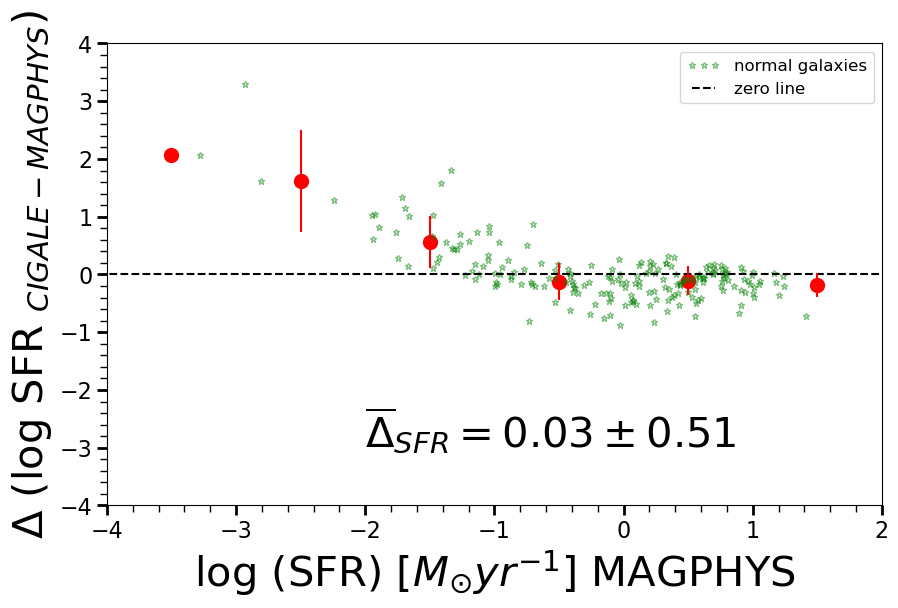

In [33]:
plt.figure(figsize=(10,6))

plt.plot(sfr_magphys_log, delta_sfr, '*', color='none', ms=5, markeredgecolor='green', label='normal galaxies', alpha=0.5)
plt.plot([-5,5],[0,0], 'k--', label='zero line')

plt.scatter(bin_points['x_axis_points'], bin_points['y_axis_points'],color='red', s=100)#, label='median $\Delta$(SFR)/dex')
plt.errorbar(bin_points['x_axis_points'], bin_points['y_axis_points'], bin_points['y_axis_errors'],ms=1,color='red', ls='none', barsabove='True')

plt.xlabel('log (SFR) [$M_{\odot} yr^{-1}$] MAGPHYS', fontsize=30)
plt.ylabel('$\Delta$ (log SFR $_{CIGALE-MAGPHYS}$)', fontsize=30)

plt.text(-2,-3,'$\overline{\Delta}_{SFR}=0.03 \pm 0.51$', fontsize=30)

plt.legend(fontsize=12, loc='best', numpoints = 3)

plt.ylim(-4,4)
plt.xlim(-4,2)

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)

plt.minorticks_on()
plt.tick_params(axis='both',length=7,width=2,labelsize=16)
plt.tick_params(axis='both',which='minor',length=5,width=1)

plt.savefig("figure_SFR_differences_plot_gals_bins.pdf")

In [34]:
# plotting the stellar mass (M*)

# first get the data
mass_cigale = data['bayes.stellar.m_star']
mass_magphys = data['mass_stellar_best_fit']

In [35]:
# getting the log10 values
mass_cigale_log = np.log10(mass_cigale)
mass_magphys_log = np.log10(mass_magphys)

In [36]:
# calculate the differences
delta_mass = mass_cigale_log - mass_magphys_log
mean_delta_mass = np.mean(delta_mass)
print (mean_delta_mass)

0.03002197894307316


In [37]:
mass_table = Table()
mass_table['magphys'] = mass_magphys_log
mass_table['delta'] = delta_mass
mass_table

mass_table.write('calculations_mass_bins.fits',overwrite=True)

In [92]:
mass_bin_A = np.median(np.array([0.1380258184, 0.01873951253, 0.1022230948, 0.2172008901, 0.1951620086, 0.2455913108, 0.1426180634, 0.1576120671, -0.001208164976, 0.2038437052, 0.2655760886]))
mass_bin_B = np.median(np.array([0.3023768944, 0.06269266531, 0.1662527166, 0.05870956441, 0.06073444861, 0.03659123025, 0.158857095, 0.1984361111, 0.1717885819, 0.1311607363, -0.2387595926, 0.06627694045, 0.0810677681, 0.01790776171, 0.05810402732, 0.1945830042, 0.03098714063, -0.08851328719, 0.2229079927, 0.01534282205, -0.006370289312, 0.09644709432, -0.06583749515, 0.127230887, -0.002970928458, 0.009550434313, -0.009315872848, -0.1546731472, -0.2251752215, -0.2644513055, 0.2289070045, 0.1026502277, -0.08863114818, -0.09750444839, 0.2386315896, 0.08352662082, -0.2088555873, -0.02189442642, 0.2524005956, 0.07430571942, 0.02092422389, -0.03563743228, -0.09535470187, -0.005284724475, 0.04940426735, -0.0207311014, 0.04921704927, 0.1225849107, -0.1154039987, 0.2458697356, 0.04624870503, -0.0729265787, -0.06962376003, 0.3184605297, -0.03713414316, -0.006007431622, 0.1034609791, -0.3339947776, 0.1908008441, 0.2140169065, -0.07869171668, 0.2958727056, 0.1736081626, 0.3227186888, 0.1661522039, -0.1916530225, -0.1493171313, -0.05904226955, 0.1300675005, -0.2296460679, -0.0555805589, 0.167315429, -0.01667595714, -0.05152685613, 0.07631904046, 0.01410153301, -0.1138149882, -0.1599925904, 0.1358011811, -0.2844284661, 0.06989993662, -0.05347185919, 0.08654616895, -0.1196742902, 0.02056800962, 0.03509918417, 0.1290075701, 0.06844779177, 0.08728823078, -0.06316031647, -0.1041458767, 0.183786821, 0.02570679693, -0.1509951233, 0.2056182458, 0.1364991224, 0.01368682286, -0.007986853041, -0.006656307708, -0.06598425052, -0.02079393291, -0.01391216892, 0.1550811314, -0.0507178617, 0.208868674, 0.079449803, 0.01215636515, 0.1219543788, -0.01192979538, -0.06125310173, 0.1286703454, -0.1875226187, 0.1415708482, -0.08162758263, -0.1963655604, -0.03690642909, 0.236053207, 0.1497716024, 0.1043743557, 0.07452368137, 0.04139941088, -0.06202283014, 0.186809018, 0.08715759807, -0.01436184658, -0.1501376131, -0.008230184487, -0.09635345817, -0.1830153128, 0.06912612892, 0.05267647566, -0.05322053959, 0.270996363, -0.008713598885, 0.001761695413, 0.1399211892, 0.05535549887, 0.3253272314, 0.1246031693, -0.01552226004, 0.08097870095, 0.2334669662, 0.09182416747, 0.1255133116, -0.06735107683, 0.06998563785, -0.0268035722, -0.1861948536, 0.07295964395, -0.04056136379, -0.02869787008, -0.1105737712, -0.06025156676, 0.08577951834, 0.04963082801, -0.01654373635, 0.09103679081, 0.05410551358, 0.2369908093, 0.2003186417, 0.2519881199, -0.1506335507, -0.01420114576]))
mass_bin_C = np.median(np.array([-0.1116741053, -0.06400233813, -0.01739437747, -0.09145435883, -0.1119449281, -0.2032692094, 0.0008877759508, 0.01192808848, -0.1566555769, -0.01008336679, 0.08052103701, -0.03896375377, -0.1699669495, 0.07543828421, -0.05797945945, -0.1104382389, 0.07498558645, -0.1627170489, -0.05301117354, -0.1468524268, 0.03415606542, 0.06796032241, 0.2485547011, 0.02475969052, 0.04461831737, -0.02244830244, 0.05294910757, -0.04041204934, -0.1670876651, -0.005628822575, 0.1105477752]))



mass_bin_A_err = np.std(np.array([0.1380258184, 0.01873951253, 0.1022230948, 0.2172008901, 0.1951620086, 0.2455913108, 0.1426180634, 0.1576120671, -0.001208164976, 0.2038437052, 0.2655760886]))
mass_bin_B_err = np.std(np.array([0.3023768944, 0.06269266531, 0.1662527166, 0.05870956441, 0.06073444861, 0.03659123025, 0.158857095, 0.1984361111, 0.1717885819, 0.1311607363, -0.2387595926, 0.06627694045, 0.0810677681, 0.01790776171, 0.05810402732, 0.1945830042, 0.03098714063, -0.08851328719, 0.2229079927, 0.01534282205, -0.006370289312, 0.09644709432, -0.06583749515, 0.127230887, -0.002970928458, 0.009550434313, -0.009315872848, -0.1546731472, -0.2251752215, -0.2644513055, 0.2289070045, 0.1026502277, -0.08863114818, -0.09750444839, 0.2386315896, 0.08352662082, -0.2088555873, -0.02189442642, 0.2524005956, 0.07430571942, 0.02092422389, -0.03563743228, -0.09535470187, -0.005284724475, 0.04940426735, -0.0207311014, 0.04921704927, 0.1225849107, -0.1154039987, 0.2458697356, 0.04624870503, -0.0729265787, -0.06962376003, 0.3184605297, -0.03713414316, -0.006007431622, 0.1034609791, -0.3339947776, 0.1908008441, 0.2140169065, -0.07869171668, 0.2958727056, 0.1736081626, 0.3227186888, 0.1661522039, -0.1916530225, -0.1493171313, -0.05904226955, 0.1300675005, -0.2296460679, -0.0555805589, 0.167315429, -0.01667595714, -0.05152685613, 0.07631904046, 0.01410153301, -0.1138149882, -0.1599925904, 0.1358011811, -0.2844284661, 0.06989993662, -0.05347185919, 0.08654616895, -0.1196742902, 0.02056800962, 0.03509918417, 0.1290075701, 0.06844779177, 0.08728823078, -0.06316031647, -0.1041458767, 0.183786821, 0.02570679693, -0.1509951233, 0.2056182458, 0.1364991224, 0.01368682286, -0.007986853041, -0.006656307708, -0.06598425052, -0.02079393291, -0.01391216892, 0.1550811314, -0.0507178617, 0.208868674, 0.079449803, 0.01215636515, 0.1219543788, -0.01192979538, -0.06125310173, 0.1286703454, -0.1875226187, 0.1415708482, -0.08162758263, -0.1963655604, -0.03690642909, 0.236053207, 0.1497716024, 0.1043743557, 0.07452368137, 0.04139941088, -0.06202283014, 0.186809018, 0.08715759807, -0.01436184658, -0.1501376131, -0.008230184487, -0.09635345817, -0.1830153128, 0.06912612892, 0.05267647566, -0.05322053959, 0.270996363, -0.008713598885, 0.001761695413, 0.1399211892, 0.05535549887, 0.3253272314, 0.1246031693, -0.01552226004, 0.08097870095, 0.2334669662, 0.09182416747, 0.1255133116, -0.06735107683, 0.06998563785, -0.0268035722, -0.1861948536, 0.07295964395, -0.04056136379, -0.02869787008, -0.1105737712, -0.06025156676, 0.08577951834, 0.04963082801, -0.01654373635, 0.09103679081, 0.05410551358, 0.2369908093, 0.2003186417, 0.2519881199, -0.1506335507, -0.01420114576]))
mass_bin_C_err = np.std(np.array([-0.1116741053, -0.06400233813, -0.01739437747, -0.09145435883, -0.1119449281, -0.2032692094, 0.0008877759508, 0.01192808848, -0.1566555769, -0.01008336679, 0.08052103701, -0.03896375377, -0.1699669495, 0.07543828421, -0.05797945945, -0.1104382389, 0.07498558645, -0.1627170489, -0.05301117354, -0.1468524268, 0.03415606542, 0.06796032241, 0.2485547011, 0.02475969052, 0.04461831737, -0.02244830244, 0.05294910757, -0.04041204934, -0.1670876651, -0.005628822575, 0.1105477752]))

print (mass_bin_A,mass_bin_B,mass_bin_C)


print (mass_bin_A_err,mass_bin_B_err,mass_bin_C_err)


0.1576120671 0.03509918417 -0.02244830244
0.08227895674654336 0.13250745424934615 0.09947873791849454


In [93]:
mass_bin_points = Table()
mass_bin_points['x_axis_points']= [9.5, 10.5, 11.5]


mass_bin_points['y_axis_points'] = [mass_bin_A,mass_bin_B,mass_bin_C]
mass_bin_points['y_axis_errors'] = [mass_bin_A_err,mass_bin_B_err,mass_bin_C_err]


mass_bin_points


x_axis_points,y_axis_points,y_axis_errors
float64,float64,float64
9.5,0.1576120671,0.08227895674654336
10.5,0.03509918417,0.13250745424934615
11.5,-0.02244830244,0.09947873791849454


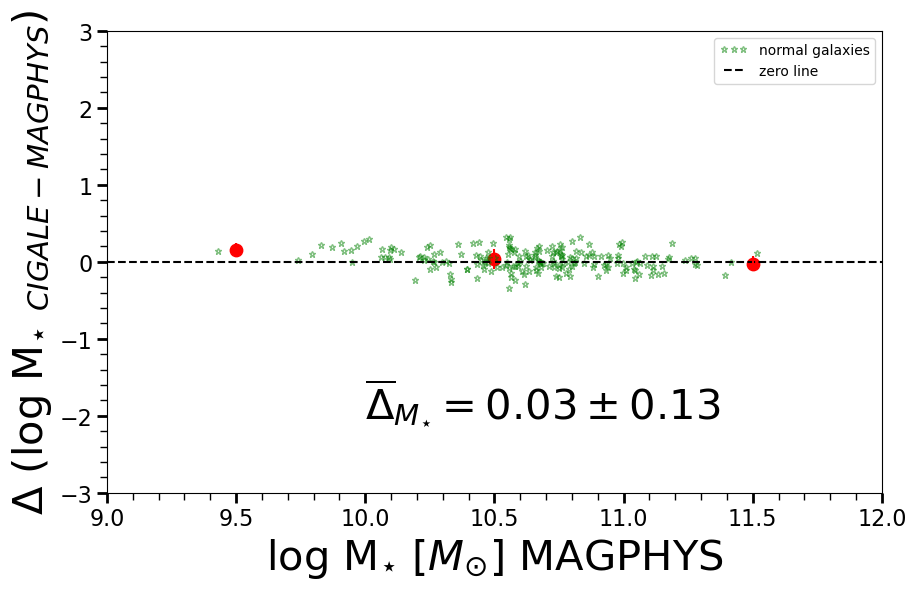

In [105]:
plt.figure(figsize=(10,6))

plt.plot(mass_magphys_log, delta_mass, '*', color='none', ms=5, markeredgecolor='green', label='normal galaxies', alpha=0.5)
plt.plot([9,12],[0,0], 'k--', label='zero line')

plt.errorbar(mass_bin_points['x_axis_points'], mass_bin_points['y_axis_points'], mass_bin_points['y_axis_errors'],ms=1,color='red', ls='none', barsabove='True')
plt.scatter(mass_bin_points['x_axis_points'], mass_bin_points['y_axis_points'],color='red', s=80)#, label='median $\Delta$(SFR)/dex', alpha=0.3)

plt.xlabel('log M$_{\star}$ [$M_{\odot}$] MAGPHYS', fontsize=30)
plt.ylabel('$\Delta$ (log M$_{\star}$ $_{CIGALE-MAGPHYS}$)', fontsize=30)


plt.text(10,-2,'$\overline{\Delta}_{M_{\star}}=0.03 \pm 0.13$', fontsize=30)

plt.legend(fontsize=10, loc='best', numpoints = 3)

plt.ylim(-3,3)
plt.xlim(9,12)

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)

plt.minorticks_on()
plt.tick_params(axis='both',length=7,width=2,labelsize=16)
plt.tick_params(axis='both',which='minor',length=5,width=1)

In [38]:
# plotting the specific SFR

# first get the data for MAGPHYS
sSFR_magphys = data['sSFR_0_1Gyr_best_fit']

# for CIGALE, we need to calculate ourselves, specefic SFR = SFR / M_star
sSFR_cigale = sfr_cigale/mass_cigale


In [39]:
# getting the log10 values
sSFR_cigale_log = np.log10(sSFR_cigale)
sSFR_magphys_log = np.log10(sSFR_magphys)

In [40]:
# calculate the differences
delta_sSFR = sSFR_cigale_log - sSFR_magphys_log
mean_delta_sSFR = np.mean(delta_sSFR)
print (mean_delta_sSFR)

-0.0019935501250475706


In [41]:
#sSFR_indices1 = np.where((delta_sSFR > -y_dex1) & (delta_sSFR < y_dex1))[0]
#sSFR_indices2 = np.where((delta_sSFR > -y_dex2) & (delta_sSFR < y_dex2))[0]
#print (len(sSFR_indices1), len(sSFR_indices1)/205)
#print (len(sSFR_indices2), len(sSFR_indices2)/205)

In [42]:
sSFR_table = Table()
sSFR_table['magphys'] = sSFR_magphys_log
sSFR_table['delta'] = delta_sSFR
sSFR_table



sSFR_table.write('calculations_sSFR_bins.fits',overwrite=True)



In [44]:


#sSFR_bin_A = np.median(np.array([2.013374825,1.596486994,3.544085243,1.026505278]))
sSFR_bin_B = np.median(np.array([1.206305818,0.9532308296,0.6251596071,1.04922373,0.5911045887,0.5992206474,0.6592102869,0.7848146058,0.4230290692,0.3945211269,0.3309343745,0.5836503691,0.1670566039,0.2971707752,0.1885969539,0.1509387924,1.007227183,0.6037597836,1.431628823,0.37263755,0.2521201446,0.4899460907,0.6022896306,0.2506278548]))
sSFR_bin_C = np.median(np.array([1.875282939,-0.03951068818,0.00785507257,0.2199247396,-0.03863169013,0.02032877546,0.05226814823,0.1210867201,-0.2667897464,-0.0250608237,1.842130211,-0.3200566108,-0.07719758727,0.294292563,-0.3818878801,-0.327312585,0.7927188383,0.000227176834,-0.2404428747,-0.2136146059,-0.3203214807,-0.2951516192,0.182166837,-0.3034359257,-0.112830142,-0.1905037891,-0.04988771446,-0.03574162483,-0.2918974728,0.2126528439,-0.2181691285,-0.1459698241,-0.04287081343,-0.07127040975,-0.2176548586,-0.1966033759,-0.04709856913,-0.4859756533,0.1199842326,-0.2649883637,-0.0670925654,0.163985961,-0.05464403671,-0.05492084571,-0.3777509196,-0.2998925606,-0.2631185655,-0.327018782,-0.3987016444,-0.09010513623]))
sSFR_bin_D = np.median(np.array([0.7330010311,-0.2257988728,-0.5813498424,-0.4927753163,-0.1087313447,-0.1267269555,-0.4322308423,-0.4481113253,-0.2669637402,-0.4319677987,-0.04211032537,-0.171316985,-0.2677489558,-0.2681059633,-0.7458003902,-0.5648641493,-0.5185423459,-0.06962998371,0.2463269179,0.4069751256,0.5069146619,-0.356528315,0.3374836692,-1.051461186,0.07569009608,-0.468034117,-0.01527268004,-0.7649434585,-0.9088874405,0.03168383719,-0.554887233,-0.8852934882,-0.4391166635,0.2194216249,-0.5496959056,-0.44256341,-0.7279424606,-0.2939127233,0.2103262859,-0.01364828247,-0.05610999004,-0.3919481089,-0.8843794184,0.1535118535,0.185512112,0.5070866348,-0.6098795485,0.2492585302,-0.5103353062,0.1196174009,-0.4178680586,-0.7474154801,0.005965535081,0.3761740075,0.003559394989,-0.1534512299,-0.03563237339,-0.359473929,-0.01267537408,0.178402726,-0.9033787101,0.3347576382,-0.04860063645,-0.02618037156,-0.1122978939,0.07308111483,-0.09656796373,0.1043659102,-0.08593357416,-0.3715541844,0.02773775752,0.05162822542,-0.0004190393729,0.09670231697,0.01904995216,0.08041519108,-0.1668813668]))
sSFR_bin_E = np.median(np.array([-0.04112757742,0.4059793713,-0.1455161751,-0.110004014,-0.3649831914,0.2725351787,-0.2352407896,-0.1793469998,-0.07948635872,-0.2742141154,0.2185321538,-0.08557776927,-0.07435055494,-0.01037968812,-0.2243621958,-0.1307489054,-0.1457748729,-0.7410953093,-0.321767949,0.1817236849,0.08430191706,-0.1598180241,0.006889118906,-0.1326093813,-0.4226403496,-0.3149178556,-0.1128285197,0.08420228436,0.006086056225,0.1431732774,-0.1617945607,-0.3247305735,0.3427245229,-0.1491931255,-0.1858470998,-0.07435232212,-0.3758423981,-0.2471455316,-0.5028425523,-0.2841590883,-0.3371994438,-0.1010095767,-0.4498043371,-0.1341306544,0.05546794223,0.1443979583,-0.06268554841,-0.5172281215,-0.2308098496]))
#sSFR_bin_F =  np.median(np.array([-0.9634720783]))



#sSFR_bin_A_err = np.std(np.array([2.013374825,1.596486994,3.544085243,1.026505278]))
sSFR_bin_B_err = np.std(np.array([1.206305818,0.9532308296,0.6251596071,1.04922373,0.5911045887,0.5992206474,0.6592102869,0.7848146058,0.4230290692,0.3945211269,0.3309343745,0.5836503691,0.1670566039,0.2971707752,0.1885969539,0.1509387924,1.007227183,0.6037597836,1.431628823,0.37263755,0.2521201446,0.4899460907,0.6022896306,0.2506278548]))
sSFR_bin_C_err = np.std(np.array([1.875282939,-0.03951068818,0.00785507257,0.2199247396,-0.03863169013,0.02032877546,0.05226814823,0.1210867201,-0.2667897464,-0.0250608237,1.842130211,-0.3200566108,-0.07719758727,0.294292563,-0.3818878801,-0.327312585,0.7927188383,0.000227176834,-0.2404428747,-0.2136146059,-0.3203214807,-0.2951516192,0.182166837,-0.3034359257,-0.112830142,-0.1905037891,-0.04988771446,-0.03574162483,-0.2918974728,0.2126528439,-0.2181691285,-0.1459698241,-0.04287081343,-0.07127040975,-0.2176548586,-0.1966033759,-0.04709856913,-0.4859756533,0.1199842326,-0.2649883637,-0.0670925654,0.163985961,-0.05464403671,-0.05492084571,-0.3777509196,-0.2998925606,-0.2631185655,-0.327018782,-0.3987016444,-0.09010513623]))
sSFR_bin_D_err = np.std(np.array([0.7330010311,-0.2257988728,-0.5813498424,-0.4927753163,-0.1087313447,-0.1267269555,-0.4322308423,-0.4481113253,-0.2669637402,-0.4319677987,-0.04211032537,-0.171316985,-0.2677489558,-0.2681059633,-0.7458003902,-0.5648641493,-0.5185423459,-0.06962998371,0.2463269179,0.4069751256,0.5069146619,-0.356528315,0.3374836692,-1.051461186,0.07569009608,-0.468034117,-0.01527268004,-0.7649434585,-0.9088874405,0.03168383719,-0.554887233,-0.8852934882,-0.4391166635,0.2194216249,-0.5496959056,-0.44256341,-0.7279424606,-0.2939127233,0.2103262859,-0.01364828247,-0.05610999004,-0.3919481089,-0.8843794184,0.1535118535,0.185512112,0.5070866348,-0.6098795485,0.2492585302,-0.5103353062,0.1196174009,-0.4178680586,-0.7474154801,0.005965535081,0.3761740075,0.003559394989,-0.1534512299,-0.03563237339,-0.359473929,-0.01267537408,0.178402726,-0.9033787101,0.3347576382,-0.04860063645,-0.02618037156,-0.1122978939,0.07308111483,-0.09656796373,0.1043659102,-0.08593357416,-0.3715541844,0.02773775752,0.05162822542,-0.0004190393729,0.09670231697,0.01904995216,0.08041519108,-0.1668813668]))
sSFR_bin_E_err = np.std(np.array([-0.04112757742,0.4059793713,-0.1455161751,-0.110004014,-0.3649831914,0.2725351787,-0.2352407896,-0.1793469998,-0.07948635872,-0.2742141154,0.2185321538,-0.08557776927,-0.07435055494,-0.01037968812,-0.2243621958,-0.1307489054,-0.1457748729,-0.7410953093,-0.321767949,0.1817236849,0.08430191706,-0.1598180241,0.006889118906,-0.1326093813,-0.4226403496,-0.3149178556,-0.1128285197,0.08420228436,0.006086056225,0.1431732774,-0.1617945607,-0.3247305735,0.3427245229,-0.1491931255,-0.1858470998,-0.07435232212,-0.3758423981,-0.2471455316,-0.5028425523,-0.2841590883,-0.3371994438,-0.1010095767,-0.4498043371,-0.1341306544,0.05546794223,0.1443979583,-0.06268554841,-0.5172281215,-0.2308098496]))
#sSFR_bin_F_err =  np.std(np.array([-0.9634720783]))



#print (sSFR_bin_A,sSFR_bin_B,sSFR_bin_C, sSFR_bin_D, sSFR_bin_E, sSFR_bin_F)
#print (sSFR_bin_A_err,sSFR_bin_B_err,sSFR_bin_C_err, sSFR_bin_D_err, sSFR_bin_E_err, sSFR_bin_F_err)

sSFR_bin_points = Table()
#sSFR_bin_points['x_axis_points']= [-13.5, -12.5, -11.5, -10.5, -9.5,  -8.5]
#sSFR_bin_points['y_axis_points'] = [sSFR_bin_A,sSFR_bin_B,sSFR_bin_C, sSFR_bin_D, sSFR_bin_E, sSFR_bin_F]
#sSFR_bin_points['y_axis_errors'] = [sSFR_bin_A_err,sSFR_bin_B_err,sSFR_bin_C_err, sSFR_bin_D_err, sSFR_bin_E_err, sSFR_bin_F_err]

sSFR_bin_points['x_axis_points']= [-12.5, -11.5, -10.5, -9.5]


sSFR_bin_points['y_axis_points'] = [sSFR_bin_B,sSFR_bin_C, sSFR_bin_D, sSFR_bin_E]
sSFR_bin_points['y_axis_errors'] = [sSFR_bin_B_err,sSFR_bin_C_err, sSFR_bin_D_err, sSFR_bin_E_err]


sSFR_bin_points


x_axis_points,y_axis_points,y_axis_errors
float64,float64,float64
-12.5,0.5873774789,0.33459958487892494
-11.5,-0.07423399851000001,0.4426322155225291
-10.5,-0.1087313447,0.3745901201333933
-9.5,-0.1341306544,0.2239717756145958


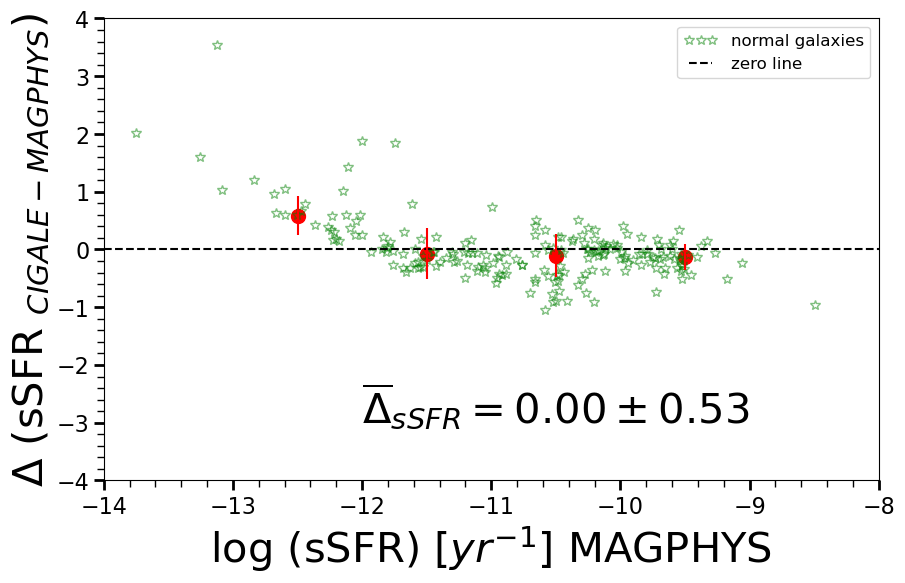

In [45]:

plt.figure(figsize=(10,6))

plt.plot(sSFR_magphys_log, delta_sSFR, '*', color='none', ms=7, markeredgecolor='green', label='normal galaxies', alpha=0.5)
plt.plot([-14,-8],[0,0], 'k--', label='zero line')

plt.errorbar(sSFR_bin_points['x_axis_points'], sSFR_bin_points['y_axis_points'], sSFR_bin_points['y_axis_errors'],ms=1,color='red', ls='none', barsabove='True')
plt.scatter(sSFR_bin_points['x_axis_points'], sSFR_bin_points['y_axis_points'],color='red', s=100)#, label='median $\Delta$(SFR)/dex')

plt.xlabel('log (sSFR) [$yr^{-1}$] MAGPHYS', fontsize=30)
plt.ylabel('$\Delta$ (sSFR $_{CIGALE-MAGPHYS}$)', fontsize=30)

plt.text(-12,-3,'$\overline{\Delta}_{sSFR}=0.00 \pm 0.53$', fontsize=30)


plt.legend(fontsize=12, loc='best', numpoints = 3)

plt.ylim(-4,4)
plt.xlim(-14,-8)

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)

plt.minorticks_on()
plt.tick_params(axis='both',length=7,width=2,labelsize=16)
plt.tick_params(axis='both',which='minor',length=5,width=1)

plt.savefig("figure_sSFR_differences_plot_gals_bins.pdf")


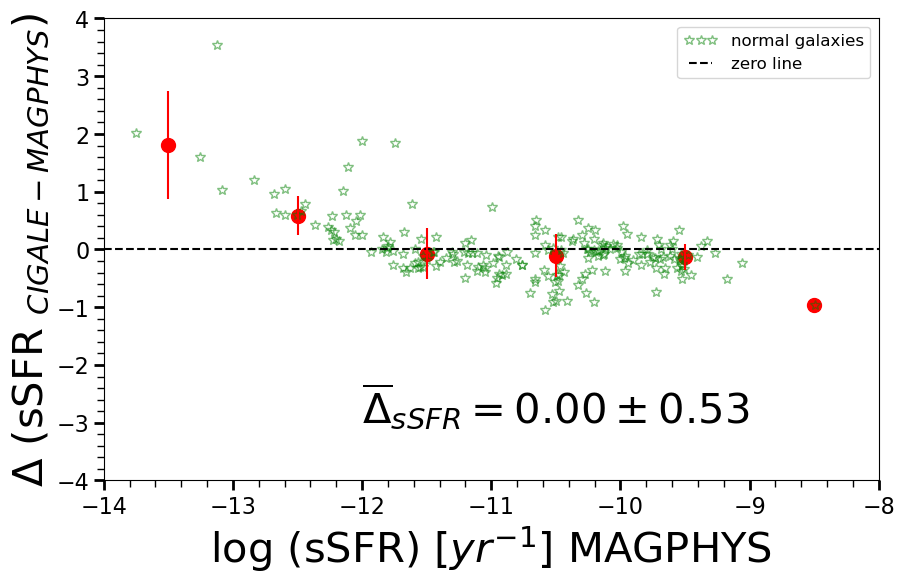

In [115]:

plt.figure(figsize=(10,6))

plt.plot(sSFR_magphys_log, delta_sSFR, '*', color='none', ms=7, markeredgecolor='green', label='normal galaxies', alpha=0.5)
plt.plot([-14,-8],[0,0], 'k--', label='zero line')

plt.errorbar(sSFR_bin_points['x_axis_points'], sSFR_bin_points['y_axis_points'], sSFR_bin_points['y_axis_errors'],ms=1,color='red', ls='none', barsabove='True')
plt.scatter(sSFR_bin_points['x_axis_points'], sSFR_bin_points['y_axis_points'],color='red', s=100)#, label='median $\Delta$(SFR)/dex')

plt.xlabel('log (sSFR) [$yr^{-1}$] MAGPHYS', fontsize=30)
plt.ylabel('$\Delta$ (sSFR $_{CIGALE-MAGPHYS}$)', fontsize=30)

plt.text(-12,-3,'$\overline{\Delta}_{sSFR}=0.00 \pm 0.53$', fontsize=30)


plt.legend(fontsize=12, loc='best', numpoints = 3)

plt.ylim(-4,4)
plt.xlim(-14,-8)

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)

plt.minorticks_on()
plt.tick_params(axis='both',length=7,width=2,labelsize=16)
plt.tick_params(axis='both',which='minor',length=5,width=1)

plt.savefig("figure_sSFR_differences_plot_gals_bins.pdf")


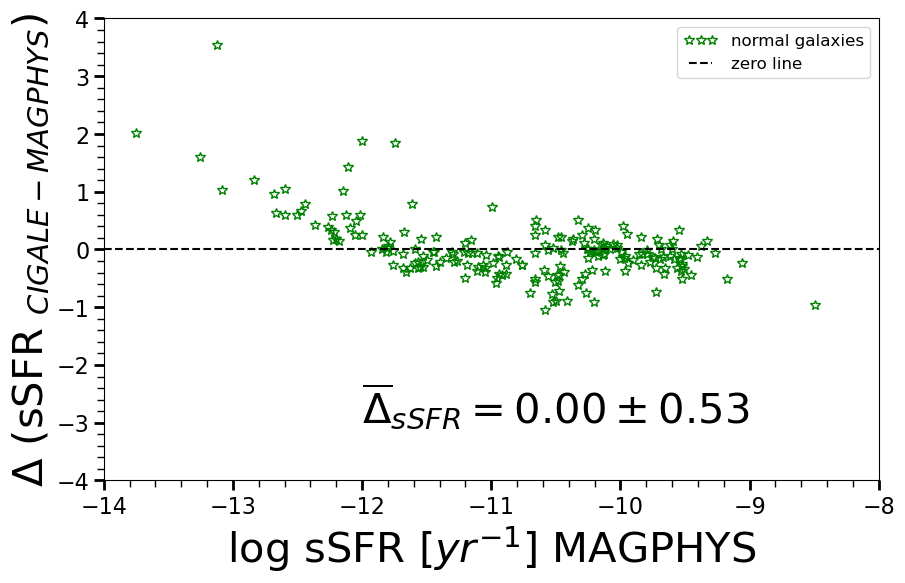

In [51]:
plt.figure(figsize=(10,6))

plt.plot(sSFR_magphys_log,delta_sSFR, '*', color='none', ms=7, markeredgecolor='green', label='normal galaxies')

plt.plot([-14,-8],[0,0], 'k--', label='zero line')
#plt.plot([-14,-8],[y_dex1,y_dex1], '-', color='orange', label='$\pm$0.1 dex line')
#plt.plot([-14,-8],[-y_dex1,-y_dex1], '-', color='orange')
#plt.plot([-14,-8],[y_dex2,y_dex2], 'm-.', label='$\pm$0.2 dex line')
#plt.plot([-14,-8],[-y_dex2,-y_dex2], 'm-.')

plt.xlabel('log (sSFR) [$yr^{-1}$] MAGPHYS', fontsize=30)
plt.ylabel('$\Delta$ (sSFR $_{CIGALE-MAGPHYS}$)', fontsize=30)

plt.text(-12,-3,'$\overline{\Delta}_{sSFR}=0.00 \pm 0.53$', fontsize=30)


plt.legend(fontsize=12, loc='best', numpoints = 3)

plt.ylim(-4,4)
plt.xlim(-14,-8)

plt.locator_params(axis='x', nbins=10)
plt.locator_params(axis='y', nbins=10)

plt.minorticks_on()
plt.tick_params(axis='both',length=7,width=2,labelsize=16)
plt.tick_params(axis='both',which='minor',length=5,width=1)

plt.savefig("figure_sSFR_differences_plot_gals.pdf")


In [33]:
# end

In [34]:
# References
#https://www.tutorialspoint.com/how-do-you-create-line-segments-between-two-points-in-matplotlib